In [1]:
%load_ext autoreload
%autoreload 2

import S4Mock_io
import matplotlib.pyplot as plt
import numpy as np
from  desitarget.targets import desi_mask, bgs_mask, mws_mask
import geometry
import healpy as hp
from astropy.table import Table,vstack,join
import astropy.io.fits as fits

In [3]:
#load in filling factor 
#so can do correction 
#add to code to discount low pixels 

In [25]:
#open randoms
nside=32
randoms = S4Mock_io.read_desitargetrandoms(number=1)
randoms=geometry.bgs_mask_randoms(randoms)
target_pixel_density = geometry.targ_hpmap(randoms)

pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *2500
filling_factor = target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor

[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


In [323]:
nside=32
pixel_area = hp.nside2pixarea(nside,degrees=True)

In [27]:
mock = S4Mock_io.read_mxxl(small=False)

In [28]:
mock['APP_MAG'][68884959]

5.5746765

In [29]:
mock['Z_OBS'][97244934]

0.8169721

In [30]:
bright_mock = mock[(mock['APP_MAG'] <= 19.5952)]
faint_mock = mock[(mock['APP_MAG'] > 19.5952) & (mock['APP_MAG'] <= 20.003)]

In [39]:
bright_mock_pixel_density = geometry.targ_hpmap(bright_mock)
faint_mock_pixel_density = geometry.targ_hpmap(faint_mock)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


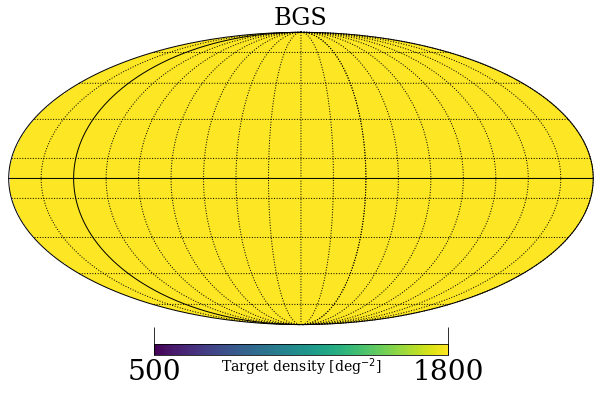

In [40]:
hp.mollview(bright_mock_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

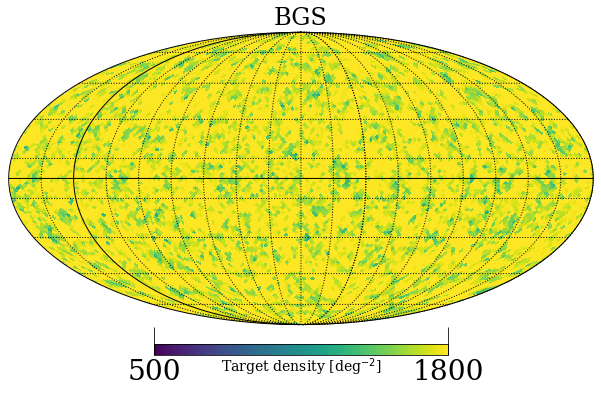

In [41]:
hp.mollview(faint_mock_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

In [34]:
bright_real = S4Mock_io.read_mainsurvey_targets_bright()
faint_real = S4Mock_io.read_mainsurvey_targets_faint()

Runtime of 0.168233 seconds after 0 pixels
Runtime of 5.440223 seconds after 20 pixels
Runtime of 9.814224 seconds after 40 pixels
Runtime of 14.740920 seconds after 60 pixels
Runtime of 18.661057 seconds after 80 pixels
Runtime of 23.622923 seconds after 100 pixels
Runtime of 29.666305 seconds after 120 pixels
Runtime of 32.821979 seconds after 140 pixels
Runtime of 36.448121 seconds after 160 pixels
Runtime of 40.934628 seconds after 180 pixels
Runtime of 46.218635 seconds after 200 pixels
Runtime of 49.998167 seconds after 220 pixels
Runtime of 52.387938 seconds after 240 pixels
Runtime of 56.175808 seconds after 260 pixels
Runtime of 59.964580 seconds after 280 pixels
Runtime of 66.085446 seconds after 300 pixels
Runtime of 71.052155 seconds after 320 pixels
Runtime of 75.436440 seconds after 340 pixels
Runtime of 79.015246 seconds after 360 pixels
Runtime of 81.830752 seconds after 380 pixels
Runtime of 85.052731 seconds after 400 pixels
Runtime of 89.720065 seconds after 420 pixe

In [35]:
bright_real_pixel_density = geometry.targ_hpmap(bright_real,norm=corr_pixel_area,filling_factor=filling_factor)
faint_real_pixel_density = geometry.targ_hpmap(faint_real,norm=corr_pixel_area,filling_factor=filling_factor)

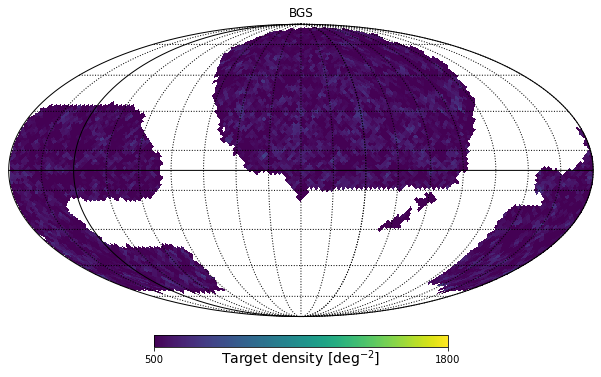

In [36]:
hp.mollview(faint_real_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

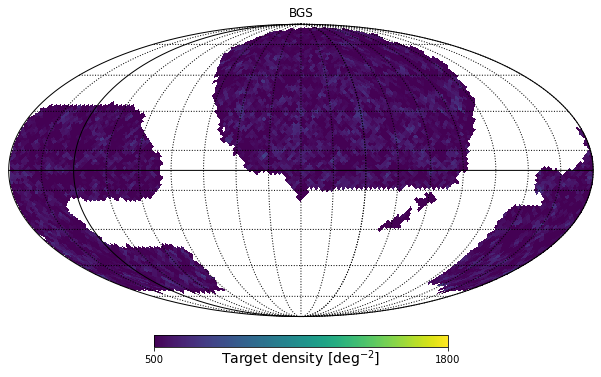

In [37]:
hp.mollview(faint_real_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS',min=500,max=1800,unit = r'Target density [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

In [24]:
#bright_real_pixel_density = bright_real_pixel_density[~np.isnan(bright_real_pixel_density)]
#faint_real_pixel_density = faint_real_pixel_density[~np.isnan(faint_real_pixel_density)]

In [14]:
faint_real_pixel_density

array([1645., 2061., 1848., ..., 1649., 1784., 1731.])

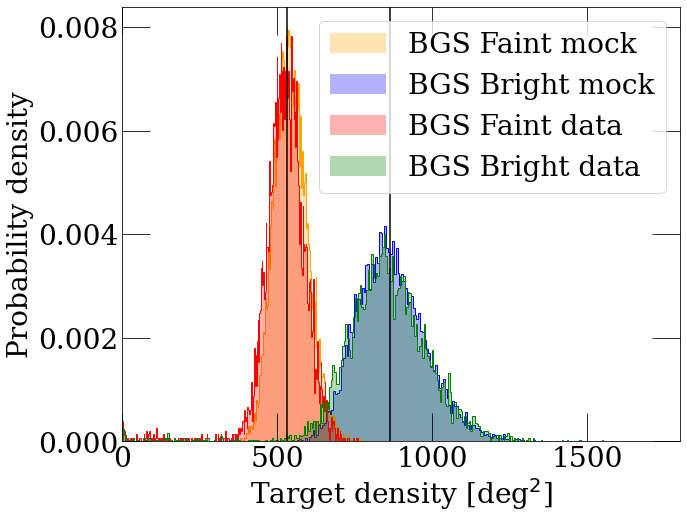

In [326]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_mock_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.3,color='orange',label='BGS Faint mock',density=True)
_ = plt.hist(bright_mock_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.3,color='blue',label='BGS Bright mock',density=True)
_ = plt.hist(faint_mock_pixel_density/pixel_area, bins=150,histtype='step',color='orange',density=True)
_ = plt.hist(bright_mock_pixel_density/pixel_area, bins=150,histtype='step',color='blue',density=True)
_ = plt.hist(faint_real_pixel_density, bins=300,histtype='bar',alpha=0.3,color='red',label='BGS Faint data',density=True)
_ = plt.hist(bright_real_pixel_density, bins=300,histtype='bar',alpha=0.3,color='green',label='BGS Bright data',density=True)
_ = plt.hist(faint_real_pixel_density, bins=300,histtype='step',color='red',density=True)
_ = plt.hist(bright_real_pixel_density, bins=300,histtype='step',color='green',density=True)
plt.axvline(x=533,color='black')
plt.axvline(x=864,color = 'black')


plt.xlabel(r'Target density [deg$^{2}$]')
plt.xlim(0,1800)
plt.ylabel('Probability density')
plt.legend()
plt.savefig('hists.png',bbox_inches='tight')

#scale to common area 

In [ ]:
"""
fassign = S4Mock_io.read_fassign_mock()
init_ledger = S4Mock_io.read_init_ledger()
init_ledger = init_ledger[((init_ledger['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]
mock_assigned = init_ledger[np.in1d(init_ledger['TARGETID'],fassign['TARGETID'])]

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full_noveto.dat.fits')
dat = x[1].data
fassign = dat[(dat['FIBERASSIGN_X']<1e20)]

"""

In [ ]:
"""
from desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask 
real_init_ledger = S4Mock_io.read_sv3_ledgers(mock=False)
real_init_ledger = real_init_ledger[(real_init_ledger['PRIORITY']==real_init_ledger['PRIORITY_INIT'])]
real_init_ledger = real_init_ledger[((real_init_ledger['SV3_BGS_TARGET']) & (bgs_mask['BGS_BRIGHT']) != 0)]

real_assigned = real_init_ledger[np.in1d(real_init_ledger['TARGETID'],fassign['TARGETID'])]
"""

In [82]:
fassign = S4Mock_io.read_fassign_mock()
favail = S4Mock_io.read_favail_mock()
init_ledger = S4Mock_io.read_init_ledger()
init_ledger = init_ledger[((init_ledger['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]
mock_assigned = init_ledger[np.in1d(init_ledger['TARGETID'],fassign['TARGETID'])]
mock_avail = init_ledger[np.in1d(init_ledger['TARGETID'],favail['TARGETID'])]

In [83]:
x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full_noveto.dat.fits')
dat = x[1].data
fassign = dat[(dat['FIBERASSIGN_X']<1e20)]

real_init_ledger = S4Mock_io.read_sv3_ledgers(mock=False)
real_init_ledger = real_init_ledger[(real_init_ledger['PRIORITY']==real_init_ledger['PRIORITY_INIT'])]
real_init_ledger = real_init_ledger[((real_init_ledger['SV3_BGS_TARGET']) & (bgs_mask['BGS_BRIGHT']) != 0)]

real_assigned = real_init_ledger[np.in1d(real_init_ledger['TARGETID'],fassign['TARGETID'])]
real_avail = real_init_ledger[np.in1d(real_init_ledger['TARGETID'],dat['TARGETID'])]


Runtime of 0.051718 seconds after 0 pixels
Runtime of 9.471348 seconds after 100 pixels


Total runtime of 16.406511 seconds after 200000 pixels


(array([ 52.,  29.,  17.,  15.,  30.,  29.,  23.,   6.,  18.,  13.,   4.,
         18.,  17.,  19.,  12.,  19.,  16.,   7.,   8.,   7.,  17.,   6.,
         20.,  19.,   8.,  12.,  15.,  16.,   9.,  18.,  19.,  13.,   5.,
         18.,  12.,   6.,  14.,  19.,  18.,   7.,  15.,  13.,   8.,  11.,
         13.,  12.,   7.,  11.,  14.,   3.,  18.,  21.,  13.,   5.,  13.,
         16.,  14.,   8.,  26.,  26.,  16.,  48.,  51.,  56.,  37.,  79.,
        102.,  58., 126., 149., 164.,  95., 193., 199.,  93., 204., 215.,
        196., 122., 200., 169., 133.,  56.,  95.,  80.,  37.,  66.,  34.,
         28.,  15.,  22.,  11.,  11.,   7.,   5.,   1.,   0.,   5.,   0.,
          1.]),
 array([0.00762546, 0.02074125, 0.03385704, 0.04697283, 0.06008862,
        0.07320441, 0.08632021, 0.099436  , 0.11255179, 0.12566758,
        0.13878337, 0.15189916, 0.16501495, 0.17813074, 0.19124653,
        0.20436232, 0.21747812, 0.23059391, 0.2437097 , 0.25682549,
        0.26994128, 0.28305707, 0.29617286, 0.

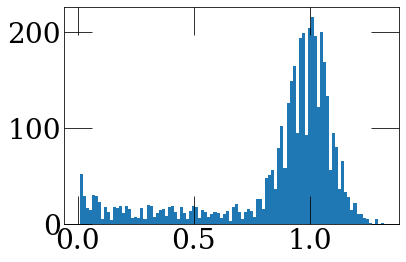

In [84]:
random = S4Mock_io.read_sv3_randoms()
uras, idx = np.unique(random['RA'], return_index=True)
random=random[idx]

pixel_area = hp.nside2pixarea(256,degrees=True)

target_pixel_density = geometry.targ_hpmap(random,nside=256)
exp_density_per_pixel = pixel_area * 2500
filling_factor = target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor 

plt.hist(filling_factor[filling_factor > 0.0],bins=100)

In [7]:
"""
mock_i_density = geometry.targ_hpmap(init_ledger,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)
real_i_density = geometry.targ_hpmap(real_init_ledger,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)
mock_a_density = geometry.targ_hpmap(mock_assigned,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)
real_a_density = geometry.targ_hpmap(real_assigned,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)

In [33]:
"""
mock_i_density = geometry.targ_hpmap(init_ledger,nside=256,filling_factor=filling_factor)
real_i_density = geometry.targ_hpmap(real_init_ledger,nside=256,filling_factor=filling_factor)
mock_a_density = geometry.targ_hpmap(mock_assigned,nside=256,filling_factor=filling_factor)
real_a_density = geometry.targ_hpmap(real_assigned,nside=256,filling_factor=filling_factor)#

In [85]:
mock_i_density = geometry.targ_hpmap(mock_avail,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)
real_i_density = geometry.targ_hpmap(real_avail,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)
mock_a_density = geometry.targ_hpmap(mock_assigned,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)
real_a_density = geometry.targ_hpmap(real_assigned,nside=256,norm=corr_pixel_area,filling_factor=filling_factor)

In [86]:
mock_i_density= mock_i_density[~np.isnan(mock_i_density)]
real_i_density= real_i_density[~np.isnan(real_i_density)]
mock_a_density= mock_a_density[~np.isnan(mock_a_density)]
real_a_density= real_a_density[~np.isnan(real_a_density)]

In [289]:
mock_a_density

In [87]:
mock_fib_eff = mock_a_density/mock_i_density
real_fib_eff = real_a_density/real_i_density

In [78]:
np.mean(real_fib_eff)

0.979331792760814

In [98]:
print(np.sum(mock_a_density)/np.sum(mock_i_density))
print(np.sum(real_a_density)/np.sum(real_i_density))

0.9818280979455708
0.9772237393910289


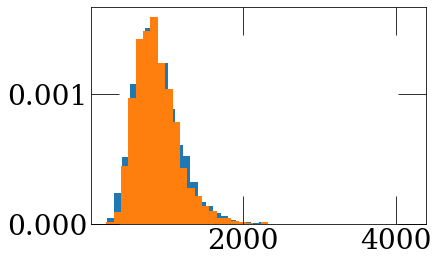

In [89]:
p = plt.hist(real_i_density,bins=40,density=True)
q = plt.hist(mock_i_density,bins=25,density=True)

In [68]:
"""
average_eff_real = []
indexes = np.digitize(real_i_density, p[1], right=False)

for i in np.sort(np.unique(indexes)):
    average_eff_real.append(np.mean(real_fib_eff[(indexes==i)]))
    
average_eff_mock = []
indexes2 = np.digitize(mock_i_density, q[1], right=False)

for i in np.sort(np.unique(indexes2)):
    average_eff_mock.append(np.mean(mock_fib_eff[(indexes2==i)]))

In [90]:
average_eff_real = []
std1 = []
indexes = np.digitize(real_i_density, p[1], right=False)

for i in np.sort(np.unique(indexes)):
    average_eff_real.append(np.mean(real_fib_eff[(indexes==i)]))
    std1.append(np.std(real_fib_eff[(indexes==i)]))
    
    
average_eff_mock = []
std2=[]
indexes2 = np.digitize(mock_i_density, q[1], right=False)

for i in np.sort(np.unique(indexes2)):
    average_eff_mock.append(np.mean(mock_fib_eff[(indexes2==i)]))
    std2.append(np.std(mock_fib_eff[(indexes2==i)]))

In [91]:
real_x = []
for i in (np.sort(np.unique(indexes))):
    real_x.append(p[1][i-1])
    
mock_x = []
for i in (np.sort(np.unique(indexes2))):
    mock_x.append(q[1][i-1])

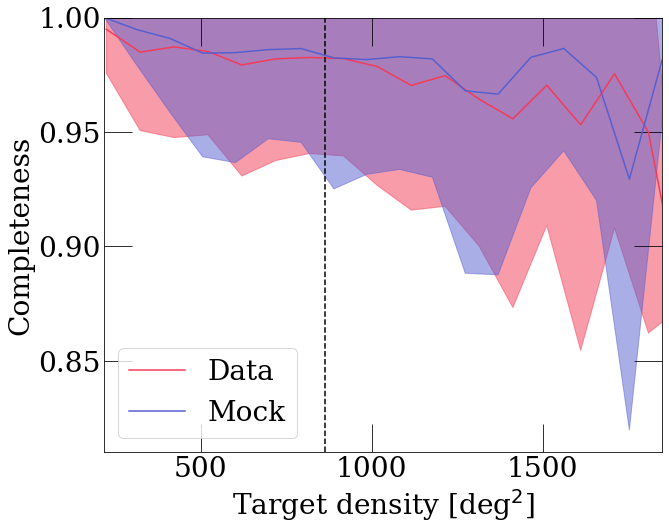

In [102]:
plt.figure(figsize=(10,8))

plt.plot(real_x, average_eff_real,color='#f53b57',label='Data')
plt.plot(mock_x, average_eff_mock,color='#575fcf',label='Mock')

plt.fill_between(real_x, np.array(average_eff_real)-np.array(std1), np.array(average_eff_real)+np.array(std1),color='#f53b57',alpha=0.5)
plt.fill_between(mock_x, np.array(average_eff_mock)-np.array(std2), np.array(average_eff_mock)+np.array(std2),color='#575fcf',alpha=0.5)


plt.xlim(mock_x[0],mock_x[-8])
plt.ylim(0.81,1)
plt.axvline(x=864,linestyle='dashed',color='black')

plt.xlabel(r'Target density [deg.$^{2}$]')
plt.legend()
plt.ylabel('Completeness')
plt.savefig('fba_surface.png',bbox_inches='tight')

In [93]:
mock_assigned

RA,DEC,PARALLAX,PMRA,PMDEC,REF_EPOCH,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,PRIORITY,NUMOBS,NUMOBS_MORE,Z,ZWARN,TIMESTAMP,VERSION,TARGET_STATE,ZTILEID,SV3_SCND_TARGET
deg,deg,mas,mas / yr,mas / yr,yr,,,,,,,,,,,,,,s,,,,
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,str19,str6,str9,int32,int64
196.0612030029297,25.66085433959961,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347712,0.32515679258074304,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.4180908203125,25.150667190551758,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347714,0.030273891124486862,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.2181396484375,25.283815383911133,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347715,0.05892080781589293,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
195.93507385253906,25.690887451171875,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347716,0.48902892884342875,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.09890747070312,25.421741485595703,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347718,0.1482139904727361,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.47406005859375,25.22732162475586,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347727,0.7327273482129021,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
196.05267333984375,25.843673706054688,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347729,0.14583100378791558,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
195.70069885253906,26.085542678833008,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230387023347731,0.8749180108389598,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0


In [ ]:
ros=0

rand = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_brightwdup_Alltiles.fits')
rand['ROS']      = np.array([tile2rosette(x) for x in rand['TILEID']]) 

rand['ROS_DIST'] = 1.e99

rand = rand[rand['ROS'] == ros]

for rosn in np.unique(rand['ROS']):
    isin = (rand['ROS'].data == rosn)

    new_dist = calc_rosr(rosn, rand['RA'][isin], rand['DEC'][isin])

    rand['ROS_DIST'][isin] = np.minimum(rand['ROS_DIST'][isin], new_dist)

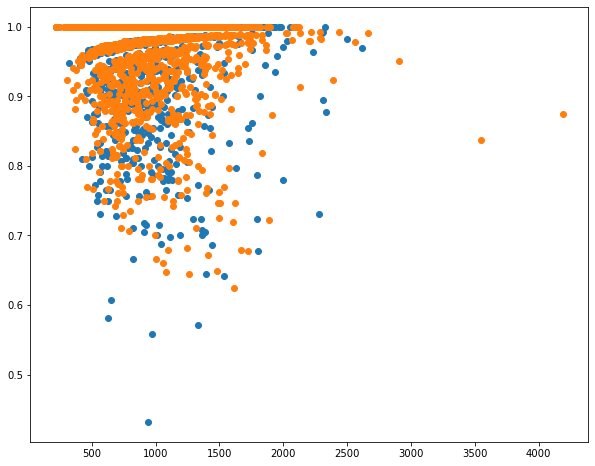

In [22]:
plt.figure(figsize=(10,8))

plt.scatter(mock_i_density,mock_fib_eff)
plt.scatter(real_i_density,real_fib_eff)

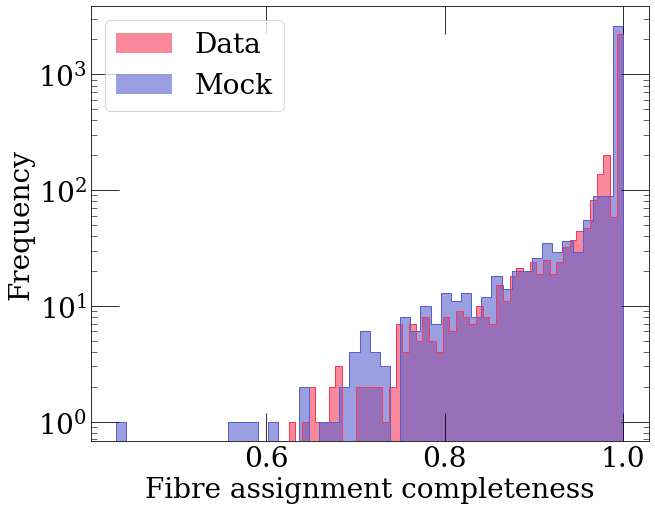

In [27]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))
plt.hist(real_fib_eff,bins=50,histtype='bar',color='#f53b57',alpha=0.6,label='Data')
plt.hist(mock_fib_eff,bins=50,histtype='bar',color='#575fcf',alpha=0.6,label='Mock')

plt.hist(real_fib_eff,bins=50,histtype='step',color='#f53b57')
plt.hist(mock_fib_eff,bins=50,histtype='step',color='#575fcf')

plt.yscale('log')
plt.ylabel('Frequency')
plt.legend()
plt.xlabel('Fibre assignment completeness')
plt.savefig('fba_comp.png',bbox_inches='tight')

No handles with labels found to put in legend.


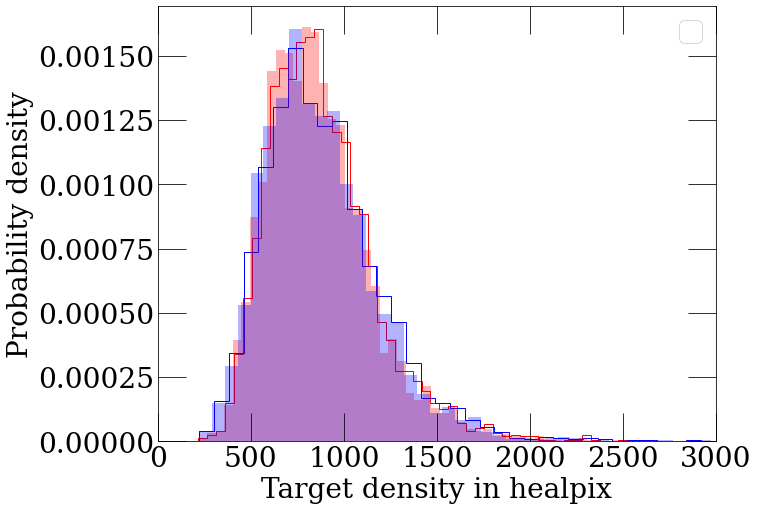

In [26]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))
"""
mock_i_density= mock_i_density[~np.isnan(mock_i_density)]
real_i_density= real_i_density[~np.isnan(real_i_density)]
mock_a_density= mock_a_density[~np.isnan(mock_a_density)]
real_a_density= real_a_density[~np.isnan(real_a_density)]

mock_i_density= mock_i_density[(mock_i_density/pixel_area>100)]
real_i_density= real_i_density[(real_i_density/pixel_area>100)]
mock_a_density= mock_a_density[(mock_a_density/pixel_area>100)]
real_a_density= real_a_density[(real_a_density/pixel_area>100)]
"""

#_ = plt.hist(mock_i_density/pixel_area, bins=50,histtype='bar',alpha=0.3,color='orange',label='Mock ledger',density=True)
#_ = plt.hist(real_i_density/pixel_area, bins=50,histtype='bar',alpha=0.3,color='blue',label='Real ledger',density=True)
_ = plt.hist(mock_i_density, bins=50,histtype='step',color='red',density=True)
_ = plt.hist(real_i_density, bins=50,histtype='step',color='blue',density=True)
#_ = plt.hist(mock_a_density/pixel_area, bins=50,histtype='bar',alpha=0.3,color='red',label='Mock assigned',density=True)
#_ = plt.hist(real_a_density/pixel_area, bins=50,histtype='bar',alpha=0.3,color='green',label='Real assigned',density=True)
_ = plt.hist(mock_a_density, bins=50,histtype='bar',alpha=0.3,color='red',density=True)
_ = plt.hist(real_a_density, bins=50,histtype='bar',alpha=0.3,color='blue',density=True)
#plt.axvline(x=533,color='black')
#plt.axvline(x=864,color = 'black')


plt.xlabel('Target density in healpix')
plt.xlim(0,3000)
plt.ylabel('Probability density')
plt.legend()
#plt.savefig('h

In [29]:
pixel_area

0.052455852825697924

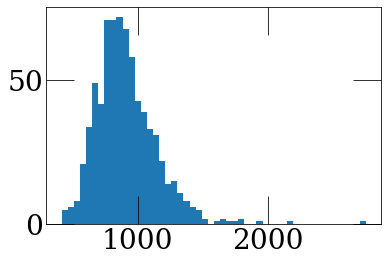

In [180]:
p=plt.hist(real_i_density,bins=50)


In [171]:
x=np.array(np.digitize(real_i_density, p[1], right=False))

In [97]:
tile_stack = []

for night in nights:
    to_grab = glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/{night}/fba-*.fits')
    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FASSIGN'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5]) # string.split('-')[-1].replace('.fits', '')
        fba['ROS'] = tile2rosette(int(to_grab[x][-11:-5]))
        tile_stack.append(fba)

fassign = vstack(tile_stack)

tile_stack = []

for night in nights:
    # to_grab = sorted(glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/{night}/fba-*.fits'))
    to_grab = glob.glob(f'/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ001/fa/SV3/{night}/fba-*.fits')
    for x in range(len(to_grab)):
        fba = Table(fits.open(to_grab[x])['FAVAIL'].data)
        fba['TILEID'] = int(to_grab[x][-11:-5])
        tile_stack.append(fba)

        # Here, we add a count of NAVAIL per targetid. 
        # TILEID at which that number becomes 3 for main-survey like

        # tiles were likely not observed in the order they assigned ....
        
favail = vstack(tile_stack)

NameError: name 'nights' is not defined

In [95]:
fassign = S4Mock_io.read_fassign_mock()
favail = S4Mock_io.read_favail_mock()
init_ledger = S4Mock_io.read_init_ledger()
init_ledger = init_ledger[((init_ledger['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]

mock_assigned = fassign[np.in1d(fassign['TARGETID'],init_ledger['TARGETID'])]
mock_avail = favail[np.in1d(favail['TARGETID'],init_ledger['TARGETID'])]

from   astropy.table import Table, vstack, join, unique

mock_assigned = unique(mock_assigned, keys='TARGETID')
mock_avail =  unique(mock_avail, keys='TARGETID')

In [96]:
mock_assigned

FIBER,TARGETID,LOCATION,FIBERSTATUS,LAMBDA_REF,PETAL_LOC,DEVICE_LOC,DEVICE_TYPE,TARGET_RA,TARGET_DEC,FA_TARGET,FA_TYPE,FIBERASSIGN_X,FIBERASSIGN_Y
int32,int64,int32,int32,float32,int16,int32,str3,float64,float64,int64,uint8,float32,float32
1364,39627758191511075,2443,0,5400.0,2,443,POS,218.3129847817101,-1.3554575773095174,8070450532248190980,1,345.58142,-191.21349
1413,39627787727799760,2121,0,5400.0,2,121,POS,178.81672501907323,-0.004537883300370895,3458764513820540928,1,192.04091,-30.569096
3499,39627806488922237,6487,0,5400.0,6,487,POS,217.0930166986863,0.787021402562179,3458764513820540928,1,-214.68721,324.32922
4727,39627884876271777,9463,0,5400.0,9,463,POS,211.21213095457597,4.033946610676072,3458764513820803076,1,-291.2876,-270.35223
3996,39633419763716081,7076,0,5400.0,7,76,POS,271.0683494255684,62.82941393953778,8070450532247929860,1,-149.25389,48.59339
3945,39633419780490071,7385,0,5400.0,7,385,POS,272.8071751583444,62.86990717798095,8070450532247929860,1,-321.44336,100.4279
1275,39633451355212011,2102,0,5400.0,2,102,POS,267.9038794914507,65.67515077913986,8070450532247928832,1,164.37022,-105.50324
3871,39633456321266273,7202,0,5400.0,7,202,POS,271.94751429477134,66.29193176616927,8070450532247929860,1,-239.20584,50.82794
957,288230385739890690,1138,0,5400.0,1,138,POS,217.51210021972656,33.58879089355469,1152921504606846976,1,86.87404,-209.69437
